In [2]:
import cv2
import numpy as np
import math
from matplotlib.widgets import Cursor
from matplotlib import pyplot as plt

def getImage(image):
    path = '/Users/alexandrasmith/Desktop/Digital Image Processing 793/Assignment 2/'
    im = cv2.imread(path + image, cv2.IMREAD_GRAYSCALE)
    return im.astype(np.double)

def find(element, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == element:
                return [i, j]

def mouseRGB(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
        int = image[y,x]
        print("intensity: ",int)
        print("Coordinates of pixel: X: ",x,"Y: ",y)

def apply_gamma(image, gamma):
    y = image**gamma
    new_im = np.array((255/np.max(y))*(image**gamma), dtype=np.uint8)
    return new_im

def apply_log(image):
    Y = np.log(1 + image)
    c = 255/np.max(Y)
    #c = 255/np.log(1 + np.max(image))
    new_im = np.array(c*np.log(1+image), dtype=np.uint8)
    return new_im

def smoothen(image, kernel_dim):
    # create averaging box filter
    kernel = (1/(kernel_dim*kernel_dim))*np.ones((kernel_dim, kernel_dim), dtype = int)
    blur = cv2.filter2D(image, -1, kernel)
    return blur.astype(np.uint8)

def sharpen(image, kernel_dim):
    L = np.ones((kernel_dim, kernel_dim), dtype = int)
    # location of centre pixel
    c = int(np.ceil(kernel_dim/2) - 1)
    L[c][c] = -(kernel_dim**2 - 1)
    kernel = (1/(kernel_dim*kernel_dim))*L
    mask = cv2.filter2D(image, -1, kernel)
    # c = -1
    sharp = image - mask
    return sharp

def high_boost(image, kernel_dim, k, var):
    # k > 1 for high boost filter
    # blur original image
    blur = cv2.GaussianBlur(image, (kernel_dim, kernel_dim), var)
    # get mask
    mask = image - blur
    # sharpen
    sharp = image + k * mask
    return sharp

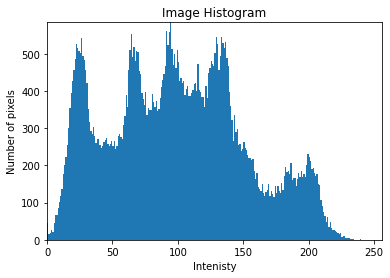

In [3]:
ims = ['lenna256.jpg', 'choir.jpg', 'city_left.bmp', 'city_right.bmp', 'chest_xray.tif']
image = getImage(ims[0])
name = ims[0]

plt.hist(image.ravel(), 256, [0, 256])
plt.xlabel('Intenisty')
plt.ylabel('Number of pixels')
plt.margins(x=0)
plt.margins(y=0)
plt.title('Image Histogram')
plt.show()

In [ ]:
i3 = smoothen(image, 3)
i5 = smoothen(image, 5)
i7 = smoothen(image, 7)
i11 = smoothen(image, 11)

j3 = sharpen(image, 3)
j5 = sharpen(image, 5)
j7 = sharpen(image, 7)
j11 = sharpen(image, 11)

# clip values into range (0, 255)
j3 = np.clip(j3, 0, 255)
j5 = np.clip(j5, 0, 255)
j7 = np.clip(j7, 0, 255)
j11 = np.clip(j11, 0, 255)

In [ ]:
# Question 1a
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Smoothing 3x3')
ax[0].imshow(i3, cmap="gray")
ax[1].set_title('Sharpening 3x3')
ax[1].imshow(j3, cmap="gray")

# plot histograms
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].hist(i3.ravel(), 256, [0, 256])
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Number of pixels')
ax[0].margins(x=0)
ax[0].margins(y=0)
ax[0].set_title('Smoothed Histogram')
ax[1].hist(j3.ravel(), 256, [0, 256])
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Number of pixels')
ax[1].margins(x=0)
ax[1].margins(y=0)
ax[1].set_title('Sharpened Histogram');

In [ ]:
# Question 1b
# smoothing
fig, ax = plt.subplots(1, 3, figsize = (15, 15))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Smoothing 5x5')
ax[0].imshow(i5, cmap="gray")
ax[1].set_title('Smoothing 7x7')
ax[1].imshow(i7, cmap="gray")
ax[2].set_title('Smoothing 11x11')
ax[2].imshow(i11, cmap="gray")

# plot histograms
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax[0].hist(i5.ravel(), 256, [0, 256])
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Number of pixels')
ax[0].margins(x=0)
ax[0].margins(y=0)
ax[0].set_title('Smoothed Histogram')
ax[1].hist(i7.ravel(), 256, [0, 256])
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Number of pixels')
ax[1].margins(x=0)
ax[1].margins(y=0)
ax[1].set_title('Smoothed Histogram')
ax[2].hist(i11.ravel(), 256, [0, 256])
ax[2].set_xlabel('Intensity')
ax[2].set_ylabel('Number of pixels')
ax[2].margins(x=0)
ax[2].margins(y=0)
ax[2].set_title('Smoothed Histogram');

In [ ]:
# sharpening
fig, ax = plt.subplots(1, 3, figsize = (15, 15))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Sharpening 5x5')
ax[0].imshow(j5, cmap="gray")
ax[1].set_title('Sharpening 7x7')
ax[1].imshow(j7, cmap="gray")
ax[2].set_title('Sharpening 11x11')
ax[2].imshow(j11, cmap="gray")

# plot histograms
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax[0].hist(j5.ravel(), 256, [0, 256])
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Number of pixels')
ax[0].margins(x=0)
ax[0].margins(y=0)
ax[0].set_title('Sharpened Histogram')
ax[1].hist(j7.ravel(), 256, [0, 256])
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Number of pixels')
ax[1].margins(x=0)
ax[1].margins(y=0)
ax[1].set_title('Sharpened Histogram')
ax[2].hist(j11.ravel(), 256, [0, 256])
ax[2].set_xlabel('Intensity')
ax[2].set_ylabel('Number of pixels')
ax[2].margins(x=0)
ax[2].margins(y=0)
ax[2].set_title('Sharpened Histogram');

In [ ]:
# Question 4
image = getImage(ims[4])
r, c = image.shape
plt.imshow(image, cmap="gray")
plt.show()

s = high_boost(image, 7, 5, 1.5)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.imshow(s, cmap="gray")
plt.title("Result of high-boost filtering")
plt.show()

# Histogram equalisation
eq = cv2.equalizeHist(s.astype(np.uint8))

plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.imshow(eq, cmap="gray")
plt.title("Result of histogram equalisation")

In [ ]:
# # Gaussian high pass filter function
# P, Q = 2*r, 2*c
# # pad image (use zero-padding)
# im = cv2.copyMakeBorder(image, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
# plt.imshow(im, cmap="gray")
# plt.show()
# # center Fourier transform - done with shift function?
# for i in range(P):
#     for j in range(Q):
#         im[i][j] = im[i][j]*((-1)**(i + j))
# plt.imshow(im.astype(np.uint8), cmap="gray");
# plt.show()

# # compute DFT
# F = np.fft.fft2(im)
# # display purposes
# shift = np.fft.fftshift(F)
# Y = np.log(1 + shift)
# cc = 255/np.max(Y)
# spectrum = np.array(cc*np.log(1 + np.abs(shift)), dtype=np.uint8)
# plt.imshow(spectrum, cmap="gray")
# plt.show()

# # Filter transfer function, D_0 = 70
# D0 = 70
# H = np.zeros((P, Q))
# for u in range(P):
#     for v in range(Q):
#         D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
#         H[u][v] =  1 - np.exp((-D**2)/(2*(D0**2)))
# plt.imshow(H, cmap="gray")

# # High frequency emphasis filtering
# k1 = 0.5; k2 = 0.75

# # form product elementwise
# G = np.multiply(k1 + k2 * H, F)
# g = np.real(np.fft.ifft2(G))
# for i in range(P):
#     for j in range(Q):
#         g[i][j] = g[i][j]*(-1)**(i + j)

In [ ]:
# # obtain final result of same size of original image
# hpf = g[0:r, 0:c]
# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.imshow(hpf, cmap="gray")
# plt.title("Result of high frequency emphasis filtering")
# plt.show()

# # Histogram equalisation
# eq = cv2.equalizeHist(hpf.astype(np.uint8))
# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.imshow(eq, cmap="gray")
# plt.title("Result of histogram equalisation")

In [ ]:
# Question 3
image1 = getImage(ims[2])
image2 = getImage(ims[3])
# image dimensions: 480x640 

r,c = image1.shape
kernel = image2[215:245, 30:60]
plt.imshow(kernel, cmap="gray")
plt.title("Template")
plt.show()
w_ = np.mean(kernel)
m, n = kernel.shape
# pad image
im = cv2.copyMakeBorder(image1, int(m/2), int(m/2), int(n/2), int(n/2), cv2.BORDER_CONSTANT, value = 0)
plt.imshow(im, cmap="gray")
plt.show()

co_m = np.zeros((r, c))
for i in range(r):
    for j in range(c):
        centrex = int(m/2) + i
        centrey = int(n/2) + j
        area = im[centrex-int(m/2):centrex+int(m/2), centrey-int(n/2):centrey+int(n/2)]
        f_ = np.mean(area)
        # calculate correlation coefficient
        s1 = 0; s2 = 0; s3 = 0; sum = 0
        for s in range(m):
            for t in range(n):
                k = kernel[s][t] - w_
                ii = im[i + s][j + t] - f_
                s1 = s1 + (k * ii)
                s2 = s2 + k**2
                s3 = s3 + ii**2
        co_m[i][j] = s1/np.sqrt(s2 * s3)

In [ ]:
# locate pixel with maximum correlation => best match
max_co = np.max(co_m)
xy = find(max_co, co_m)
r2, c2 = image2.shape
# number of rows of new image (stays the same)
xx = r
# number of columns of new image
yy = int(xy[1] + c2 - 2*n/2)
new = np.zeros((xx, yy))

# fill in first image
for i in range(r):
    for j in range(c):
        new[i][j] = image1[i][j]
# fill in second image
for i in range(r2):
    for j in range(c2):
        new[i][xy[1] + j - 2*int(n/2)] = image2[i][j]

plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.imshow(new, cmap="gray")
plt.title("The aligned images.")

In [ ]:
# image enhancement
# blur area around stitch line
blur = cv2.GaussianBlur(new, (3, 7), 0)
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.imshow(blur, cmap="gray")
plt.title("Final enhanced image")
plt.show()

# Create ROI coordinates
topLeft = (xy[1]- 2*int(n/2) - 20, 0)
bottomRight = (xy[1] - 2*int(n/2) + 6, r)
x, y = topLeft[0], topLeft[1]
w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]

# Grab ROI with Numpy slicing and blur
ROI = new[y:y+h, x:x+w]
blur1 = cv2.GaussianBlur(ROI, (7, 7), 0) 

# Insert ROI back into image
new[y:y+h, x:x+w] = blur1

plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.imshow(new, cmap="gray")
plt.show()

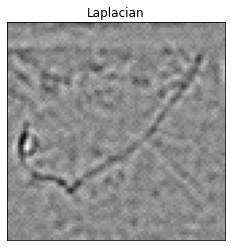

In [4]:
# Question 2
image = getImage(ims[1])

# plt.imshow(image.astype(np.uint8), cmap="gray")
# plt.show()

r, c = image.shape
# get bounding box of thread
box = image[120:200, 660:740].astype(np.uint8)

# plt.imshow(box, cmap="gray")
# plt.title("Bounding box of thread")
# plt.show()

# (T, thresh) = cv2.threshold(box, 10, 255, cv2.THRESH_BINARY)
# plt.imshow(thresh, cmap="gray")
# plt.show()

img_blur = cv2.GaussianBlur(box, (5, 5), 0)
lap = cv2.Laplacian(img_blur, cv2.CV_64F)
# lap = cv2.convertScaleAbs(lap)

# rescale values in laplacian
rr, cc = lap.shape
OldMin = np.min(lap)
OldMax = np.max(lap)
NewMin = 0
NewMax = 255
OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  
for i in range(rr):
    for j in range(cc):
        pixel = lap[i][j]
        lap[i][j] = int((((pixel - OldMin) * NewRange) / OldRange) + NewMin)

plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.imshow(lap, cmap="gray")
plt.title("Laplacian")
plt.show()

# lap_b = cv2.medianBlur(lap.astype(np.uint8), 3)
# g = apply_gamma(lap_b.astype(np.uint8), 0.5)
# plt.imshow(g, cmap="gray")
# plt.title("Laplacian blur")
# plt.show()

# get image mask
R, C = box.shape
mask = np.zeros((R, C))
for i in range(R):
    for j in range(C):
        # check threshold for edges
        if lap[i][j] < 115:
            mask[i][j] = 255
mask[0:2, :] = 0
mask[0:40, 0:50] = 0
# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.imshow(mask, cmap="gray")
# plt.title("Mask")
# plt.show()


In [ ]:
# apply mask to get rid of thread
new = np.zeros((R, C))
for i in range(R):
    for j in range(C):
        # check threshold for edges
        if mask[i][j] == 0:
            new[i][j] = box[i][j]
        else:
            # set to average pixel value of small neighbourhood (7x7)
            n = box[i-4:i+4, j-4:j+4]
            av = np.mean(n)
            new[i][j] = av
# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.imshow(new, cmap="gray")
# plt.title("No more thread")
# plt.show()

# put box back into image
image[120:200, 660:740] = new

# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.imshow(image.astype(np.uint8), cmap="gray")
# plt.title("Final")
# plt.show()

In [ ]:

# Q2 b : high-boost filtering
plt.imshow(image, cmap="gray")
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.show()
im = high_boost(image, 5, 4, 0)
plt.imshow(im, cmap="gray")

Error: Session cannot generate requests